In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the dataset

In [104]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## 3.  Perform visualization

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

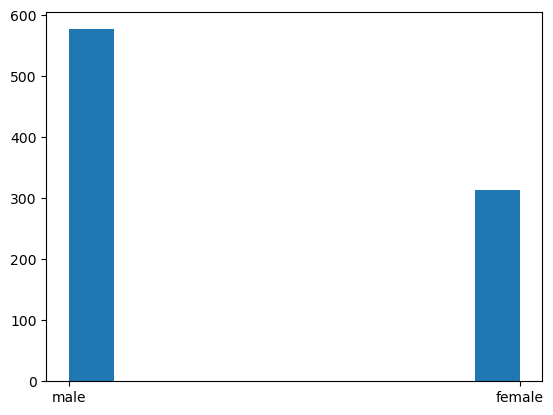

In [8]:
plt.hist(data['sex'])

<BarContainer object of 891 artists>

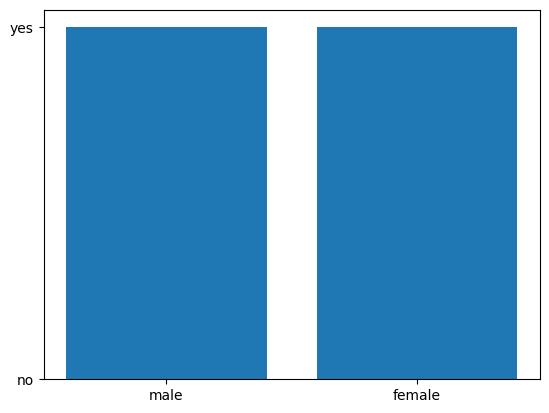

In [9]:
plt.bar(data.sex, data.alive)

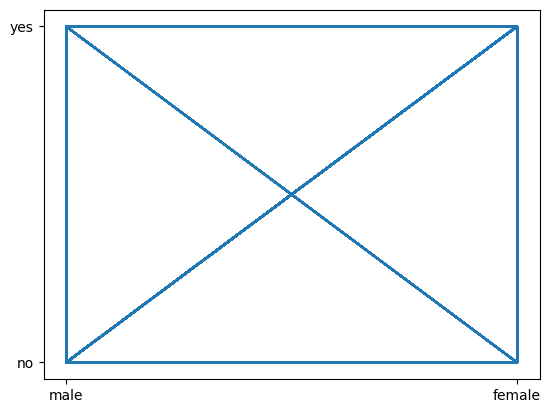

In [11]:
plt.plot(data.sex, data.alive)

In [19]:
data.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

([<matplotlib.patches.Wedge at 0x22b3b9c23e0>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'Southampton'),
  Text(0.4614522559226597, -0.9985298270476893, 'Cherbourg'),
  Text(1.0595276168013974, -0.29563698894954155, 'Queenstown')])

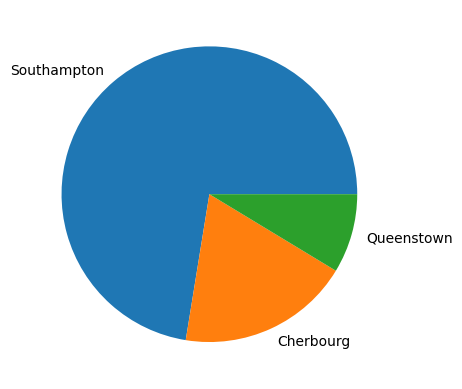

In [22]:
plt.pie(data['embark_town'].value_counts(), labels = data.embark_town.value_counts().index)

In [23]:
data2 = data.corr()

C:\Users\Jayraj\AppData\Local\Temp\ipykernel_15272\3511277236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2 = data.corr()


<Axes: >

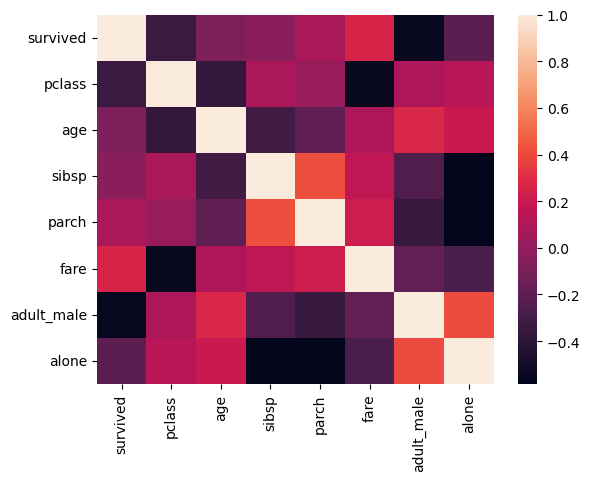

In [24]:
sns.heatmap(data2)

## 4. Descriptive statistics 

In [28]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [29]:
data['age'].median()

28.0

In [30]:
data['survived'].mode() #many have not survived

0    0
Name: survived, dtype: int64

In [31]:
a,b = min(data['age']),max(data['age'])

In [33]:
range = b - a
range

79.58

In [34]:
var = np.var(data)

E:\Conda\lib\site-packages\numpy\core\fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [35]:
var

survived         0.236506
pclass           0.698231
age            210.723580
sibsp            1.214678
parch            0.648999
fare          2466.665312
adult_male       0.239454
alone            0.239454
dtype: float64

In [36]:
np.std(data)

E:\Conda\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


survived       0.486319
pclass         0.835602
age           14.516321
sibsp          1.102124
parch          0.805605
fare          49.665534
adult_male     0.489340
alone          0.489340
dtype: float64

In [39]:
data_series = pd.Series(data['age'])
data_iqr = data_series.quantile(0.75) - data_series.quantile(0.25)

In [41]:
data_series.quantile(0.75)

38.0

In [42]:
data_series.quantile(0.25)

20.125

In [43]:
data_iqr

17.875

## 5. Handle missing values

In [44]:
data.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [47]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
data.size

13365

In [105]:
data['age'].fillna(data['age'].mean(), inplace = True)

In [106]:
data['deck'].fillna(data['deck'].mode()[0], inplace = True)

In [107]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace = True)

In [108]:
data['embark_town'].fillna(data['embark_town'].mode()[0], inplace = True)

In [60]:
data.isnull().sum() #after filling the null values with mean and mode

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 6. Outliers and Replace them

<Axes: >

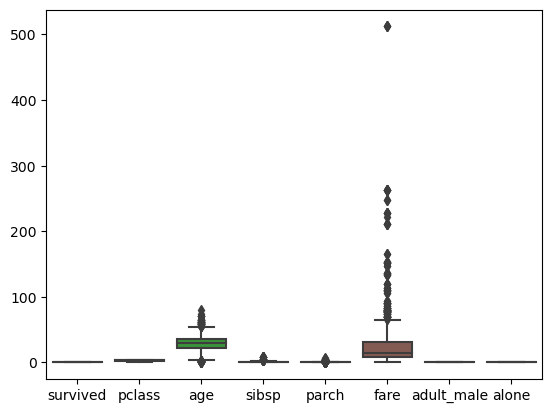

In [61]:
sns.boxplot(data)

In [109]:
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1

In [110]:
outliers = (data['fare'] < (Q1 - 1.5 * IQR)) | (data['fare'] > (Q3 + 1.5 * IQR))

In [111]:
median = data['fare'].median()
data.loc[outliers, 'fare'] = medianmedian = data['fare'].median()
data.loc[outliers, 'fare'] = median

<Axes: >

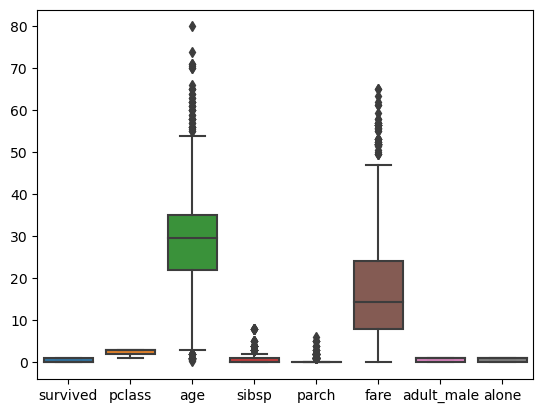

In [67]:
sns.boxplot(data)

In [112]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

In [113]:
outliers = (data['age'] < (Q1 - 1.5 * IQR)) | (data['age'] > (Q3 + 1.5 * IQR))

In [114]:
median = data['age'].median()
data.loc[outliers, 'age'] = median

<Axes: >

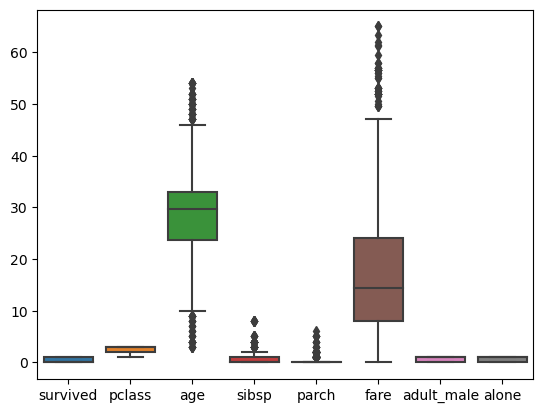

In [71]:
sns.boxplot(data)

## 7. Encoding 

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [76]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,14.4542,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()

In [115]:
data['sex'] = le.fit_transform(data['sex'])

In [116]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,0,38.0,1,0,14.4542,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [117]:
data['embarked'] = le.fit_transform(data['embarked'])
data['class'] = le.fit_transform(data['class'])
data['who'] = le.fit_transform(data['who'])
data['adult_male'] = le.fit_transform(data['adult_male'])
data['deck'] = le.fit_transform(data['deck'])
data['embark_town'] = le.fit_transform(data['embark_town'])
data['alive'] = le.fit_transform(data['alive'])
data['alone'] = le.fit_transform(data['alone'])

In [83]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.0,1,0,14.4542,0,0,2,0,2,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,1


## 8. Split the data

In [84]:
from sklearn.model_selection import train_test_split

In [118]:
x = data.drop(columns = ['survived'], axis = 1)

In [119]:
y = data['survived']

In [120]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [121]:
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,0,0
1,1,0,38.0,1,0,14.4542,0,0,2,0,2,0,1,0
2,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,1
3,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,1


## 9. Scaling independent values


In [90]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scale = MinMaxScaler()

In [123]:
names = data.columns

In [124]:
data = scale.fit_transform(data)

In [125]:
data = pd.DataFrame(data, columns = names)

In [126]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0.0,1.0,1.0,0.372549,0.125,0.0,0.111538,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,0.0
1,1.0,0.0,0.0,0.686275,0.125,0.0,0.222372,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0
2,1.0,1.0,0.0,0.450980,0.000,0.0,0.121923,1.0,1.0,1.0,0.0,0.333333,1.0,1.0,1.0
3,1.0,0.0,0.0,0.627451,0.125,0.0,0.816923,1.0,0.0,1.0,0.0,0.333333,1.0,1.0,0.0
4,0.0,1.0,1.0,0.627451,0.000,0.0,0.123846,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0


## 10. Training and testing data

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [129]:
x_train.size

9968

In [134]:
x_test.size

2506

In [135]:
x_test.size + x_train.size

12474

In [137]:
x.size

12474

In [138]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
140,3,0,29.699118,0,2,15.2458,0,2,2,0,2,0,0,0
439,2,1,31.000000,0,0,10.5000,2,1,1,1,2,2,0,1
817,2,1,31.000000,1,1,37.0042,0,1,1,1,2,0,0,0
378,3,1,20.000000,0,0,4.0125,0,2,1,1,2,0,0,1
491,3,1,21.000000,0,0,7.2500,2,2,1,1,2,2,0,1


In [139]:
y_test.head()

495    0
648    0
278    0
31     1
255    1
Name: survived, dtype: int64